## **DATA ANALYSIS PYTHON PROJECT-BINKI ANALYSIS**

#### ***Import Libaries***

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### ***Import Raw Data***

In [5]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/blinkit_data.csv")

#### ***Sample Data***

In [7]:
df.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### ***Sample Size of Data***

In [9]:
print("Size of Data",df.shape)

Size of Data (8523, 12)


#### ***Field Information***

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### ***Data Types***

In [13]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### ***Data Cleaning***


In [38]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low fat','low fat':'Low fat','Low fat':'Low Fat','reg':'Regular'})

In [40]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [42]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### ***Business Requriments***

#### ***KPIS Requriments***

In [20]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of items sold
no_of_item_sold=df['Sales'].count()

#Average Rating
avg_rating=df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of item Sold: {no_of_item_sold:,.1f}")
print(f"Average Rating: {avg_rating:,.1f}")


Total Sales: $1,201,681
Average Sales: $141
No of item Sold: 8,523.0
Average Rating: 4.0


#### ***Charts Requriments***

##### ***Total Sales by Fat Content:***

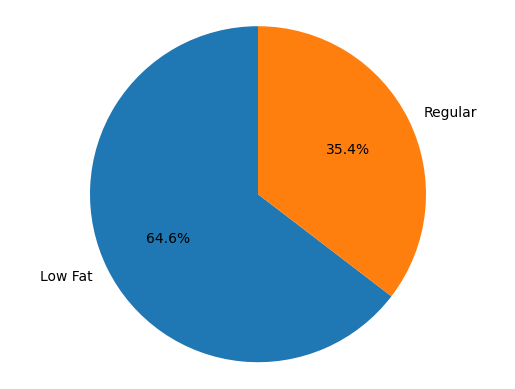

In [52]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels =sales_by_fat.index,
        autopct= '%.1f%%',
        startangle=90)
plt.title='Total Sales by Fat Content'
plt.axis('equal')
plt.show()


##### ***Total Sales by Item Type:***

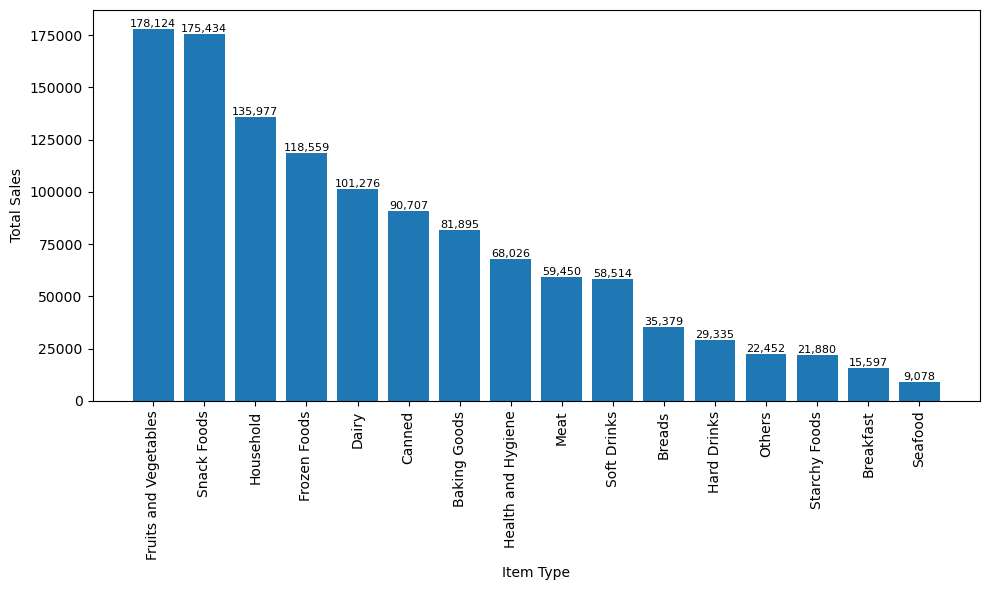

In [79]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title='Total sales by Item Type'

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f'{bar.get_height():,.0f}',
             ha='center',
             va='bottom',   # fixed typo here
             fontsize=8)

plt.tight_layout()  # added missing parentheses
plt.show()




##### ***Total Sales by Item Type:***

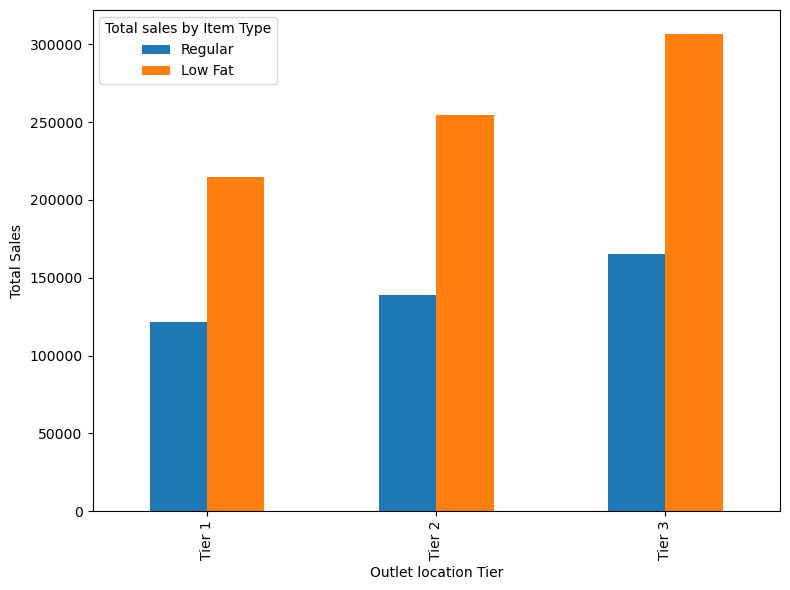

In [81]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped= grouped [['Regular','Low Fat']]
ax=grouped.plot(kind='bar',figsize=(8,6))

plt.xlabel('Outlet location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Total sales by Item Type')
plt.tight_layout()  # added missing parentheses
plt.show()

##### ***Total Sales by Outlet Establishment:***

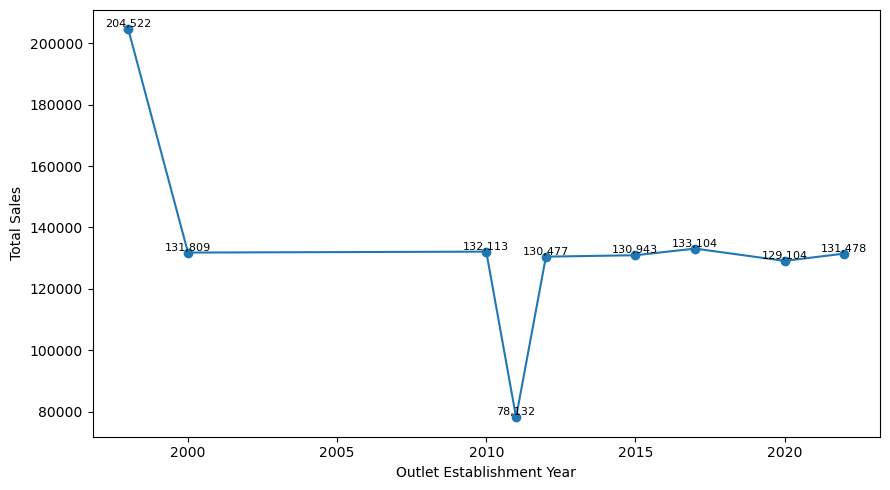

In [93]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title='Outlet Establishment'

for x,y in zip(sales_by_year.index,sales_by_year.values):
             plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()




##### ***Total Sales by Outlet Size:***

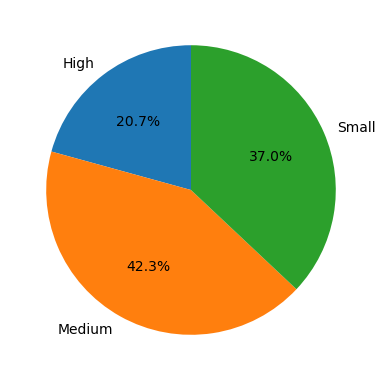

In [104]:
sales_by_size= df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title='Outlet Size'
plt.tight_layout()
plt.show()


##### ***Total Sales by Outlet Location Type:***

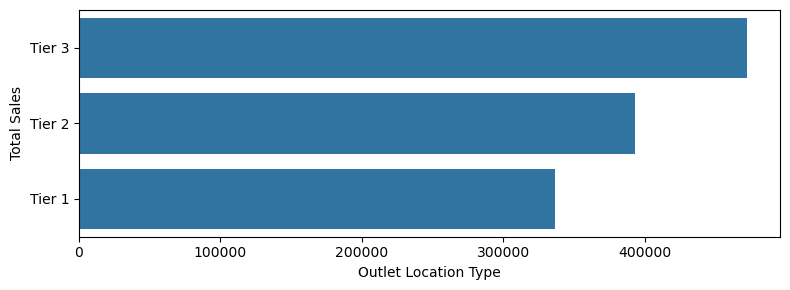

In [116]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title='Total Sales by Outlet Location Type'
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()